In [1]:
# from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from skimage import io, transform, color
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
from tqdm import tqdm
import cv2
import shutil

In [2]:
# Load and preprocess training images
image_folder   = 'D:\\kaggle projects\\Tumor\\images\\images'

In [3]:
train  = pd.read_csv('trainset.csv')
test   = pd.read_csv('testset.csv')

In [4]:
images = os.listdir(image_folder)
id_train = dict(zip(train['Id'], train['Class']))

In [5]:
# create a list for both images and labels
train_imgs = []
train_label = []

In [6]:
for cla,id in tqdm(zip(train['Class'],train['Id'])):
    try:
        i = cv2.imread(image_folder+'\\'+str(id)+'.png')
        train_imgs.append(i)
        train_label.append(cla)
    except:
        pass

539it [00:06, 85.72it/s]


In [7]:
test_imgs = []
for id in tqdm(test['Id']):
    try:
        i = cv2.imread(image_folder+'\\'+str(id)+'.png')
        test_imgs.append(i)
    except:
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 229/229 [00:02<00:00, 81.54it/s]


In [8]:
len(test_imgs)

229

In [9]:
test_imgs[0].shape

(467, 551, 3)

In [10]:
L1=[]
L2=[]
for img1 in tqdm(train_imgs):
    filtered_train = cv2.pyrMeanShiftFiltering(img1, 21, 51)
    L1.append(filtered_train)
for img2 in tqdm(test_imgs):
    filtered_test = cv2.pyrMeanShiftFiltering(img2, 21, 51)
    L2.append(filtered_test)
print(len(L1))
print(len(L2))

100%|████████████████████████████████████████████████████████████████████████████████| 229/229 [02:16<00:00,  1.68it/s]

539
229


In [11]:
train_imgs = L1
test_imgs =L2

# resize the images

In [12]:
New_Images = []
# Loop through each image in X_train and resize
for image in train_imgs:
    image = cv2.resize(image, (180, 180))
    New_Images.append(image)

# Convert the list of resized images back to a NumPy array
New_Train = np.array(New_Images)

In [110]:
len(New_Images)

539

In [13]:
New_Images = []
# Loop through each image in X_train and resize
for image in test_imgs:
    image = cv2.resize(image, (180, 180))
    New_Images.append(image)

# Convert the list of resized images back to a NumPy array
New_Test = np.array(New_Images)

In [14]:
print(len(New_Test))

229


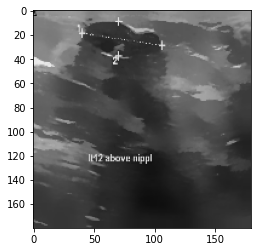

In [113]:
plt.imshow(New_Test[0])

# Normalize images

In [15]:
New_Train = New_Train/255
New_Test = New_Test/255

In [117]:
print(New_Train[0])

[[[0.34509804 0.34509804 0.34509804]
  [0.43137255 0.43137255 0.43137255]
  [0.38039216 0.38039216 0.38039216]
  ...
  [0.38039216 0.38039216 0.38039216]
  [0.36470588 0.36470588 0.36470588]
  [0.36078431 0.36078431 0.36078431]]

 [[0.09411765 0.09411765 0.09411765]
  [0.70196078 0.70196078 0.70196078]
  [0.09803922 0.09803922 0.09803922]
  ...
  [0.36470588 0.36470588 0.36470588]
  [0.36078431 0.36078431 0.36078431]
  [0.36078431 0.36078431 0.36078431]]

 [[0.01568627 0.01568627 0.01568627]
  [0.70588235 0.70588235 0.70588235]
  [0.01568627 0.01568627 0.01568627]
  ...
  [0.36078431 0.36078431 0.36078431]
  [0.36078431 0.36078431 0.36078431]
  [0.36078431 0.36078431 0.36078431]]

 ...

 [[0.08235294 0.08235294 0.08235294]
  [0.08235294 0.08235294 0.08235294]
  [0.08235294 0.08235294 0.08235294]
  ...
  [0.09411765 0.09411765 0.09411765]
  [0.09019608 0.09019608 0.09019608]
  [0.09019608 0.09019608 0.09019608]]

 [[0.08235294 0.08235294 0.08235294]
  [0.08235294 0.08235294 0.08235294]


In [16]:
Train_feature = New_Train.reshape(New_Train.shape[0], -1)
Test_feature = New_Test.reshape(New_Test.shape[0], -1)

In [17]:
Train_feature.shape

(539, 97200)

In [122]:
print(type(Train_feature))

<class 'numpy.ndarray'>


In [59]:
# Train_features = np.array(Train_flatten)
# Test_features = np.array(Test_flatten)

NameError: name 'Train_flatten' is not defined

In [131]:
train_label

['Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Normal',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Normal',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Normal',
 'Malignant',
 'Benign',
 'Normal',
 'Malignant',
 'Benign',
 'Normal',
 'Benign',
 'Benign',
 'Benign',
 'Normal',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Normal',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Normal',
 'Benign',
 'Benign',
 'Benign',
 'Normal',
 'Benign',
 'Malignant',
 'Normal',
 'Normal',
 'Malignant',
 'Benign',
 'B

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=10,  sampling_strategy='auto')
smote.fit(Train_feature, train_label)
X_resampled, y_resampled = smote.fit_resample(Train_feature, train_label)

In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled  , test_size=0.2, random_state=42)

In [135]:
X_train, X_test, y_train, y_test

720

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [30]:
pca = PCA(n_components=150 )  # You can adjust the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
X_train_pca.shape, X_test_pca.shape

((720, 150), (180, 150))

# **Modeling**

In [31]:
svm_classifier = SVC(kernel='rbf', C=3, gamma=0.001)
svm_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred1 = svm_classifier.predict(X_train_pca)
y_pred2 = svm_classifier.predict(X_test_pca)


accuracy2 = accuracy_score(y_test, y_pred2)


print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix2)

# Generate classification report
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report2)

Accuracy2: 0.8888888888888888
Confusion Matrix1:
 [[50  1  3]
 [ 9 54  2]
 [ 5  0 56]]
Classification Report:
               precision    recall  f1-score   support

      Benign       0.78      0.93      0.85        54
   Malignant       0.98      0.83      0.90        65
      Normal       0.92      0.92      0.92        61

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180



In [32]:
X_test_pca_sub = pca.transform(Test_feature)
predictions = svm_classifier.predict(X_test_pca_sub)

In [25]:
test['labels'] =predictions
test['labels'].value_counts()

Benign       145
Malignant     47
Normal        37
Name: labels, dtype: int64

In [33]:
submit = pd.read_csv('/content/sample_submition4.csv')
submit

,Id,Class
0,8560,A
1,7920,A
2,8993,A
3,8126,A
4,9912,A
...,...,...
224,8343,A
225,1255,A
226,4573,A
227,3919,A


In [34]:
submit['Id'] = test['Id']
submit['Class'] =predictions # our model predictions on the test dataset
submit

,Id,Class
0,8560,Benign
1,7920,Benign
2,8993,Malignant
3,8126,Normal
4,9912,Benign
...,...,...
224,8343,Malignant
225,1255,Benign
226,4573,Benign
227,3919,Benign


In [35]:
submit.to_csv('sample_submission_fatima5.csv', index=False)

# **Other Models**

In [151]:
print(len(X_test))

[[0.21568627 0.21568627 0.21568627 ... 0.09019608 0.09019608 0.09019608]
 [0.63120767 0.63120767 0.63120767 ... 0.01393494 0.01393494 0.01393494]
 [0.38431373 0.38431373 0.38431373 ... 0.11372549 0.11372549 0.11372549]
 ...
 [0.36232773 0.36232773 0.36232773 ... 0.19861334 0.19861334 0.19861334]
 [0.5372549  0.5372549  0.5372549  ... 0.03137255 0.03137255 0.03137255]
 [0.34117647 0.34117647 0.34117647 ... 0.25882353 0.25882353 0.25882353]]


In [35]:
len(y_test)

180

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier



# Create a k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=2)  # You can adjust the number of neighbors

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the k-NN classifier
knn_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred1 = knn_classifier.predict(X_train_pca)
y_pred2 = knn_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_train, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_train, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)


Accuracy1: 0.9861111111111112
Accuracy2: 0.8111111111111111
Confusion Matrix1:
 [[246   0   0]
 [  7 228   0]
 [  3   0 236]]
Confusion Matrix2:
 [[35  8 11]
 [ 6 54  5]
 [ 4  0 57]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       0.96      1.00      0.98       246
   Malignant       1.00      0.97      0.98       235
      Normal       1.00      0.99      0.99       239

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720

Classification Report2:
               precision    recall  f1-score   support

      Benign       0.78      0.65      0.71        54
   Malignant       0.87      0.83      0.85        65
      Normal       0.78      0.93      0.85        61

    accuracy                           0.81       180
   macro avg       0.81      0.80      0.80       180
weighted avg       0.81      0.81      0.81       180



## DT

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(
                                                   random_state=14,
                                                )  # You can adjust random_state if needed

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Decision Tree classifier
decision_tree_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred1 = decision_tree_classifier.predict(X_train_pca)
y_pred2 = decision_tree_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_train, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_train, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)


Accuracy1: 1.0
Accuracy2: 0.6722222222222223
Confusion Matrix1:
 [[246   0   0]
 [  0 235   0]
 [  0   0 239]]
Confusion Matrix2:
 [[31 17  6]
 [14 44  7]
 [ 9  6 46]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       246
   Malignant       1.00      1.00      1.00       235
      Normal       1.00      1.00      1.00       239

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

Classification Report2:
               precision    recall  f1-score   support

      Benign       0.57      0.57      0.57        54
   Malignant       0.66      0.68      0.67        65
      Normal       0.78      0.75      0.77        61

    accuracy                           0.67       180
   macro avg       0.67      0.67      0.67       180
weighted avg       0.67      0.67      0.67       180



# RF

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=20,
                                                  min_samples_split=2, min_samples_leaf=1,
                                                  min_weight_fraction_leaf=0.0, max_features='sqrt',
                                                  max_leaf_nodes=None, min_impurity_decrease=0.0,
                                                  bootstrap=True, oob_score=False, n_jobs=None,
                                                  verbose=0, warm_start=False,
                                                  ccp_alpha=0.0, max_samples=0.5) # class_weight={'Normal':4, 'Malignant':2}
# You can adjust n_estimators and other hyperparameters

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Random Forest classifier
random_forest_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred1 = random_forest_classifier.predict(X_train_pca)
y_pred2 = random_forest_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_train, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_train, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)


Accuracy1: 1.0
Accuracy2: 0.8222222222222222
Confusion Matrix1:
 [[246   0   0]
 [  0 235   0]
 [  0   0 239]]
Confusion Matrix2:
 [[36 10  8]
 [ 6 58  1]
 [ 3  4 54]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       246
   Malignant       1.00      1.00      1.00       235
      Normal       1.00      1.00      1.00       239

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

Classification Report2:
               precision    recall  f1-score   support

      Benign       0.80      0.67      0.73        54
   Malignant       0.81      0.89      0.85        65
      Normal       0.86      0.89      0.87        61

    accuracy                           0.82       180
   macro avg       0.82      0.81      0.81       180
weighted avg       0.82      0.82      0.82       180



# Extra Tree

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Create an Extra Trees classifier
extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)
# You can adjust n_estimators and other hyperparameters

# Assuming you have X_train_pca, y_train, X_val_pca, y_val
# Train the Extra Trees classifier
extra_trees_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred1 = extra_trees_classifier.predict(X_train_pca)
y_pred2 = extra_trees_classifier.predict(X_val_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred1)
accuracy2 = accuracy_score(y_val, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_train, y_pred1)
conf_matrix2 = confusion_matrix(y_val, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_train, y_pred1)
class_report2 = classification_report(y_val, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)


Accuracy1: 1.0
Accuracy2: 0.5370370370370371
Confusion Matrix1:
 [[243   0   0]
 [  0 118   0]
 [  0   0  70]]
Confusion Matrix2:
 [[56  0  1]
 [30  0  0]
 [19  0  2]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       243
   Malignant       1.00      1.00      1.00       118
      Normal       1.00      1.00      1.00        70

    accuracy                           1.00       431
   macro avg       1.00      1.00      1.00       431
weighted avg       1.00      1.00      1.00       431

Classification Report2:
               precision    recall  f1-score   support

      Benign       0.53      0.98      0.69        57
   Malignant       0.00      0.00      0.00        30
      Normal       0.67      0.10      0.17        21

    accuracy                           0.54       108
   macro avg       0.40      0.36      0.29       108
weighted avg       0.41      0.54      0.40       108



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Gradient Boosting classifier
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=3,  # You can adjust this parameter
    learning_rate=0.1,  # You can adjust this parameter
)

# Train the Gradient Boosting classifier
gradient_boosting_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred1 = gradient_boosting_classifier.predict(X_train_pca)
y_pred2 = gradient_boosting_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy1 = accuracy_score(y_train, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy1:", accuracy1)
print("Accuracy2:", accuracy2)

# Calculate confusion matrix
conf_matrix1 = confusion_matrix(y_train, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix1:\n", conf_matrix1)
print("Confusion Matrix2:\n", conf_matrix2)

# Generate classification report
class_report1 = classification_report(y_train, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
print("Classification Report1:\n", class_report1)
print("Classification Report2:\n", class_report2)


Accuracy1: 1.0
Accuracy2: 0.8277777777777777
Confusion Matrix1:
 [[246   0   0]
 [  0 235   0]
 [  0   0 239]]
Confusion Matrix2:
 [[37  8  9]
 [ 4 56  5]
 [ 2  3 56]]
Classification Report1:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00       246
   Malignant       1.00      1.00      1.00       235
      Normal       1.00      1.00      1.00       239

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720

Classification Report2:
               precision    recall  f1-score   support

      Benign       0.86      0.69      0.76        54
   Malignant       0.84      0.86      0.85        65
      Normal       0.80      0.92      0.85        61

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.83      0.83      0.83       180



In [1]:
import matplotlib.pyplot as plt

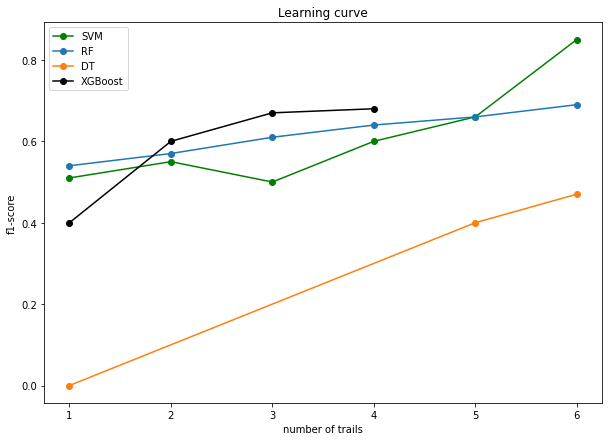

In [24]:
# number of employees of A
emp_count = [1,2,3,4,5,6]
year = [0.51,0.55,0.5,0.6,0.66,0.85]
plt.figure(figsize=(10,7))
# plot a line chart
plt.plot(emp_count, year, 'o-g',label='SVM')
plt.plot(emp_count,[0.54,0.57,0.61,0.64,0.66,0.69],'o-',label='RF')
plt.plot([1,5,6],[0,0.4,0.47],'o-',label='DT')
plt.plot([1,2,3,4],[0.40,0.60,0.67,0.68],'o-k',label='XGBoost')
# set axis titles
plt.xlabel("number of trails")
plt.ylabel("f1-score")
# set chart title
plt.legend()
plt.title("Learning curve")
plt.show()